In [1]:
import math
import random
import time
from math import exp
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from numpy import *
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler


In [3]:
from Bayesneuralnet_regcls import MCMC, Network, scikit_linear_mod
from convergence_test import gelman_rubin

In [6]:

def make_results_folder():
    # Define the base folder name
    base_folder = 'result'
    
    # Initialize the folder number
    folder_number = 1
    
    # Generate the folder name
    folder_name = f"{base_folder}{folder_number}"
    
    # Check if the folder exists
    while os.path.exists(folder_name):
        # If it exists, increment the folder number and generate the new folder name
        folder_number += 1
        folder_name = f"{base_folder}{folder_number}"
    
    # Create the new folder
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
    return folder_name

In [9]:
for i in os.listdir():
    if "result" in i:
        print (i[6:])


1
1 - Copy
2


In [10]:
def resume_training(maxruns):

    res = [int(i[6:8]) if not(i[6:8] == '') else 0 for i in os.listdir() if "result" in i]
    folder_name = f"result{max(res)}"
    
    if(os.path.exists(folder_name)):
        #print(folder_name)
        checkpoint = f"{folder_name}/checkpoint.txt"
        if (os.path.exists(checkpoint)):
            #print(checkpoint)
            
            problem, run = np.loadtxt(checkpoint)
            problem_num = int(problem)
            run_num = int(run)
            print()
            print()
            print(problem_num,run_num)
            print()
            print()
            if run_num < maxruns-1:
                
                if problem_num >= len(os.listdir("data/")):
                    print('Resuming Training for all problems at run number ', run_num )
                    problem_num = 1
                    
                else:
                    print('Resuming Training at problem ', problem_num, " run number ", run_num )
                    
            else:
                if problem_num >= len(os.listdir("data/")):
                    print("Starting Training at problem 1, run 0 in new results folder")
                    problem_num = 1
                    run_num = 0
                    folder_name = make_results_folder()
                    
                else:
                    run_num = 0
                    problem_num += 1
                    print('Resuming Training at next ', problem_num, " run number ", run_num )
                    
            
            ###################################################################################    
            
            return problem_num, run_num, folder_name
            
        else:
            return 1,0, folder_name
    else:
        return 1,0, make_results_folder()
        
    
resume_training(30)

(1, 0, 'result2')

In [ ]:
def get_dataset_details(problem):

    w_limit =  0.025 # step size for w
    tau_limit = 0.2 # step size for eta
    save = True
    name = ""
    
    
    
    if problem == "Lazer":
        # problem 1
        data = np.genfromtxt('data/Lazer/Lazer_processed.csv',delimiter=',')
        #traindata = np.loadtxt("data/Lazer/train.txt")
        #testdata = np.loadtxt("data/Lazer/test.txt")  #
        name = "Lazer"
        hidden = 5
        input = 4  
        output = 1
        prob_type = 'regression'
        numSamples = 50000 
        #numSamples = 500
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == "Sunspot":
        # problem 2
        data = np.genfromtxt('data/Sunspot/Sunspots.csv',delimiter=',')
        #traindata = np.loadtxt("data/Sunspot/train.txt")
        #testdata = np.loadtxt("data/Sunspot/test.txt")  #
        name = "Sunspot"
        hidden = 5
        input = 4  #
        output = 1
        prob_type = 'regression' 
        numSamples = 50000 
        
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

    
    elif problem == "abalone":
        # abalone
        data = np.genfromtxt('data/abalone/abalone.data',delimiter=',')
        name = "abalone"
        hidden = 12
        input = 8 #input
        output = 1
        train_ratio = 0.6

        
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

        
        prob_type = 'regression' 
        numSamples = 50000
        #numSamples = 200
    
    elif problem == "Iris":
        # problem 4
        data  = np.genfromtxt('data/iris.csv',delimiter=';')
        classes = data[:,4].reshape(data.shape[0],1)-1
        features = data[:,0:4]#Normalizing Data
    
        name = "Iris"
        hidden = 12
        input = 4 #input
        output = 3
    
        for k in range(input):
            mean = np.mean(features[:,k])
            dev = np.std(features[:,k])
            features[:,k] = (features[:,k]-mean)/dev
            train_ratio = 0.6 #choose
            indices = np.random.permutation(features.shape[0])
            traindata = np.hstack([features[indices[:int(train_ratio*features.shape[0])],:],classes[indices[:int(train_ratio*features.shape[0])],:]])
            testdata = np.hstack([features[indices[int(train_ratio*features.shape[0])]:,:],classes[indices[int(train_ratio*features.shape[0])]:,:]])
            prob_type = 'classification'
        numSamples = 50000 
        
    elif problem == "Ionosphere":
        # problem 5
        data = np.genfromtxt('data/ionesphere/ionosphere.csv',delimiter=',')
        print(data)
        
        #traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
        #testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
        
        name = "Ionosphere"
        hidden = 50
        input = 34 #input
        output = 2
        prob_type = 'classification'
        numSamples = 50000

        train_ratio = 0.6
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

    return traindata,testdata, prob_type, [input,hidden,output]

In [11]:
w_limit =  0.025 # step size for w
tau_limit = 0.2 # step size for eta
save = True
name = ""
maxruns = 30

problem_num, run_num, results_folder = resume_training(maxruns)


for problem in range(problem_num,6,1):    

    if problem == 1:
        # problem 1
        data = np.genfromtxt('data/Lazer/Lazer_processed.csv',delimiter=',')
        #traindata = np.loadtxt("data/Lazer/train.txt")
        #testdata = np.loadtxt("data/Lazer/test.txt")  #
        name = "Lazer"
        hidden = 5
        input = 4  
        output = 1
        prob_type = 'regression'
        numSamples = 50000 
        #numSamples = 500
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == 2:
        # problem 2
        data = np.genfromtxt('data/Sunspot/Sunspots.csv',delimiter=',')
        #traindata = np.loadtxt("data/Sunspot/train.txt")
        #testdata = np.loadtxt("data/Sunspot/test.txt")  #
        name = "Sunspot"
        hidden = 5
        input = 4  #
        output = 1
        prob_type = 'regression' 
        numSamples = 50000 
        
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

    
    
    
    elif problem == 3:
        # problem 3
        data  = np.genfromtxt('data/iris.csv',delimiter=';')
        classes = data[:,4].reshape(data.shape[0],1)-1
        features = data[:,0:4]#Normalizing Data
    
        name = "Iris"
        hidden = 12
        input = 4 #input
        output = 3
    
        for k in range(input):
            mean = np.mean(features[:,k])
            dev = np.std(features[:,k])
            features[:,k] = (features[:,k]-mean)/dev
            train_ratio = 0.6 #choose
            indices = np.random.permutation(features.shape[0])
            traindata = np.hstack([features[indices[:int(train_ratio*features.shape[0])],:],classes[indices[:int(train_ratio*features.shape[0])],:]])
            testdata = np.hstack([features[indices[int(train_ratio*features.shape[0])]:,:],classes[indices[int(train_ratio*features.shape[0])]:,:]])
            prob_type = 'classification'
        numSamples = 50000 
        
    elif problem == 4:
        # problem 4
        data = np.genfromtxt('data/ionesphere/ionosphere.csv',delimiter=',')
        print(data)
        
        #traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
        #testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
        
        name = "Ionosphere"
        hidden = 50
        input = 34 #input
        output = 2
        prob_type = 'classification'
        numSamples = 50000

        train_ratio = 0.6
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
    

    
    
    if not os.path.exists(results_folder+'/'+name):
        # If it doesn't exist, create it
        os.makedirs(results_folder+'/'+name)

    
    
    topology = [input, hidden, output] 
    
    
    use_langevin_gradients  = True
    l_prob = 0.5
    learn_rate = 0.01
    
    
    for i in range(run_num,maxruns,1):
    #for i in range(1):
        timer = time.time() 
        mcmc = MCMC( use_langevin_gradients , l_prob,  learn_rate, numSamples, traindata, testdata, topology, prob_type)  # declare class
    
    
        [pos_w, pos_tau, fx_train, fx_test, x_train, x_test, p_train, p_test, accept_ratio] = mcmc.sampler(w_limit, tau_limit)
        print('sucessfully sampled')
    
        burnin = 0.5 * numSamples  # use post burn in samples
    
        timer2 = time.time()
    
        timetotal = (timer2 - timer) /60
        print((timetotal), 'min taken')
    
        pos_w = pos_w[int(burnin):, ]
        pos_tau = pos_tau[int(burnin):, ]
    
        fx_mu = fx_test[int(burnin):,].mean(axis=0)
        fx_high = np.percentile(fx_test[int(burnin):,], 95, axis=0)
        fx_low = np.percentile(fx_test[int(burnin):,], 5, axis=0)
    
        fx_mu_tr = fx_train[int(burnin):,].mean(axis=0)
        fx_high_tr = np.percentile(fx_train[int(burnin):,], 95, axis=0)
        fx_low_tr = np.percentile(fx_train[int(burnin):,], 5, axis=0)
    
        pos_w_mean = pos_w.mean(axis=0) 
    
        p_tr = np.mean(p_train[int(burnin):])
        ptr_std = np.std(p_train[int(burnin):])
        p_tes = np.mean(p_test[int(burnin):])
        ptest_std = np.std(p_test[int(burnin):])
        print(p_tr, ptr_std, p_tes, ptest_std)
        
        if save:
            np.savetxt(results_folder+'/' + name + '/pos_w_' + str(i) + '.txt', pos_w)
            outres_db = open(results_folder+'/' + name + '/pos_w_' + str(i) + 'result.txt',"a+")
            outres_db.write( f"{use_langevin_gradients}, {learn_rate}, {p_tr}, {ptr_std}, {p_tes}, {ptest_std}, {accept_ratio}, {timetotal}\n")
            np.savetxt(results_folder+'/checkpoint.txt', np.asarray([problem,i]).astype(int))
    
    
        ytestdata = testdata[:, input]
        ytraindata = traindata[:, input]
        
        
        if prob_type == 'regression':
            print('---RMSE train---')
            print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
            print('high', mcmc.rmse(ytraindata, fx_high_tr))
            print('low', mcmc.rmse(ytraindata, fx_low_tr))
            print('---RMSE test---')
            print('mean', mcmc.rmse(ytestdata, fx_mu))
            print('high', mcmc.rmse(ytestdata, fx_high))
            print('low', mcmc.rmse(ytestdata, fx_low))
        else:
            print('---accuracy train---')
            print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
            print('high', mcmc.accuracy(ytraindata, fx_high_tr))
            print('low', mcmc.accuracy(ytraindata, fx_low_tr))
            print('---accuracy test---')
            print('mean', mcmc.accuracy(ytestdata, fx_mu))
            print('high', mcmc.accuracy(ytestdata, fx_high))
            print('low', mcmc.accuracy(ytestdata, fx_low)) 


    

y_train size:  298
y_test size:  200
evaluate Initial w
-2086.830045879272  Initial likelihood
50 132.35211583682457 -40.36220918160974 -0.024501999026096566 0.1549309599897827 0.16880269111901802 accepted
350 242.18941315588754 -39.847630242382756 0 0.10693572151977503 0.11342115745319234 accepted
500 273.7859366490487 -40.106737825786084 -0.004295969087429685 0.09635272390720594 0.10042703185849094 accepted
550 279.9354271223571 -40.07327521611826 0 0.09436893969896283 0.09890578846900987 accepted
650 280.96206233531325 -40.076314020690454 0 0.0941092659911211 0.09844684294790337 accepted
700 281.3613945262787 -39.93100602077684 0 0.09374093327648617 0.0990371795505612 accepted
800 285.0758430461792 -40.15702033024001 -0.0017912909277871814 0.09282732566805998 0.09702613440017321 accepted
950 290.09256891978373 -40.28949331170648 -0.011446573130051318 0.09114583627581035 0.09437241988763496 accepted
1200 295.55858678209586 -40.41620545680444 0 0.08939377584061348 0.09215046055841238 

In [19]:
p_tes

0.17635246485961956

In [26]:
w_limit =  0.025 # step size for w
tau_limit = 0.2 # step size for eta
save = True
name = ""

problem = 4

if problem == 1:
    # problem 1
    traindata = np.loadtxt("data/Lazer/train.txt")
    testdata = np.loadtxt("data/Lazer/test.txt")  #
    name = "Lazer"
    hidden = 5
    input = 4  
    output = 1
    prob_type = 'regression'
    numSamples = 50000 
    #numSamples = 500
    
elif problem == 2:
    # problem 2
    traindata = np.loadtxt("data/Sunspot/train.txt")
    testdata = np.loadtxt("data/Sunspot/test.txt")  #
    name = "Sunspot"
    hidden = 5
    input = 4  #
    output = 1
    prob_type = 'regression' 
    numSamples = 50000 
elif problem == 3:
    # abalone
    data = np.genfromtxt('data/abalone/abalone.data',delimiter=',')
    name = "abalone"
    hidden = 12
    input = 8 #input
    output = 1
    train_ratio = 0.8
    
    np.random.shuffle(data)
    scaler = MinMaxScaler()
    scaler.fit(data)
    traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
    testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
    
    prob_type = 'regression' 
    #numSamples = 20000
    numSamples = 200
elif problem == 4:
    # problem 4
    data  = np.genfromtxt('data/iris.csv',delimiter=';')
    classes = data[:,4].reshape(data.shape[0],1)-1
    features = data[:,0:4]#Normalizing Data

    name = "Iris"
    hidden = 12
    input = 4 #input
    output = 3

    for k in range(input):
        mean = np.mean(features[:,k])
        dev = np.std(features[:,k])
        features[:,k] = (features[:,k]-mean)/dev
        train_ratio = 0.7 #choose
        indices = np.random.permutation(features.shape[0])
        traindata = np.hstack([features[indices[:int(train_ratio*features.shape[0])],:],classes[indices[:int(train_ratio*features.shape[0])],:]])
        testdata = np.hstack([features[indices[int(train_ratio*features.shape[0])]:,:],classes[indices[int(train_ratio*features.shape[0])]:,:]])
        prob_type = 'classification'
    #numSamples = 500 
    numSamples = 50000 
elif problem == 5:
    # problem 5
    traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
    testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
    name = "Ionosphere"
    hidden = 50
    input = 34 #input
    output = 2
    prob_type = 'classification'
    #numSamples = 200
    numSamples = 20000

In [28]:
# Bayesian neural network

topology = [input, hidden, output] 


use_langevin_gradients  = True
l_prob = 0.5
learn_rate = 0.01


for i in range(5):
#for i in range(1):
    timer = time.time() 
    mcmc = MCMC( use_langevin_gradients , l_prob,  learn_rate, numSamples, traindata, testdata, topology, prob_type)  # declare class


    [pos_w, pos_tau, fx_train, fx_test, x_train, x_test, p_train, p_test, accept_ratio] = mcmc.sampler(w_limit, tau_limit)
    print('sucessfully sampled')

    burnin = 0.5 * numSamples  # use post burn in samples

    timer2 = time.time()

    timetotal = (timer2 - timer) /60
    print((timetotal), 'min taken')

    pos_w = pos_w[int(burnin):, ]
    pos_tau = pos_tau[int(burnin):, ]

    fx_mu = fx_test[int(burnin):,].mean(axis=0)
    fx_high = np.percentile(fx_test[int(burnin):,], 95, axis=0)
    fx_low = np.percentile(fx_test[int(burnin):,], 5, axis=0)

    fx_mu_tr = fx_train[int(burnin):,].mean(axis=0)
    fx_high_tr = np.percentile(fx_train[int(burnin):,], 95, axis=0)
    fx_low_tr = np.percentile(fx_train[int(burnin):,], 5, axis=0)

    pos_w_mean = pos_w.mean(axis=0) 

    p_tr = np.mean(p_train[int(burnin):])
    ptr_std = np.std(p_train[int(burnin):])
    p_tes = np.mean(p_test[int(burnin):])
    ptest_std = np.std(p_test[int(burnin):])
    print(p_tr, ptr_std, p_tes, ptest_std)
    
    if save:
        np.savetxt('result/' + name + '/pos_w_' + str(i) + '.txt', pos_w)
        outres_db = open('result/' + name + '/pos_w_' + str(i) + 'result.txt', "a+")
        np.savetxt(outres_db, ( use_langevin_gradients, learn_rate, p_tr, ptr_std, p_tes, ptest_std, accept_ratio, timetotal), fmt='%1.5f')



    ytestdata = testdata[:, input]
    ytraindata = traindata[:, input]
    
    
    if prob_type == 'regression':
        print('---RMSE train---')
        print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
        print('high', mcmc.rmse(ytraindata, fx_high_tr))
        print('low', mcmc.rmse(ytraindata, fx_low_tr))
        print('---RMSE test---')
        print('mean', mcmc.rmse(ytestdata, fx_mu))
        print('high', mcmc.rmse(ytestdata, fx_high))
        print('low', mcmc.rmse(ytestdata, fx_low))
    else:
        print('---accuracy train---')
        print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
        print('high', mcmc.accuracy(ytraindata, fx_high_tr))
        print('low', mcmc.accuracy(ytraindata, fx_low_tr))
        print('---accuracy test---')
        print('mean', mcmc.accuracy(ytestdata, fx_mu))
        print('high', mcmc.accuracy(ytestdata, fx_high))
        print('low', mcmc.accuracy(ytestdata, fx_low)) 

  
    

y_train size:  105
y_test size:  79
evaluate Initial w
-123.96420902131132  Initial likelihood
0 -124.04945436579064 -161.28463607815098 0 33.33333333333333 63.29113924050633 accepted
50 -110.73367750263523 -161.25650223734624 -1.3838304480460843 35.23809523809524 64.55696202531645 accepted
100 -91.87658141982222 -161.29790240835214 -0.10650157359373535 77.14285714285715 72.15189873417721 accepted
150 -89.01420669069171 -161.39532263272415 0 79.04761904761905 72.15189873417721 accepted
200 -86.63700903254032 -161.52997674922625 0 79.04761904761905 73.41772151898735 accepted
250 -83.64331783617266 -161.6832661079744 -0.029846697037262393 81.9047619047619 77.21518987341773 accepted
300 -83.24162792817326 -161.7866378075735 0 83.80952380952381 79.74683544303798 accepted
350 -82.7188884996678 -162.05980445888056 -0.08998533092627414 87.61904761904762 83.54430379746836 accepted
400 -81.63493946717337 -162.15129160018108 0 86.66666666666667 82.27848101265823 accepted
450 -80.87728969219253 -

KeyboardInterrupt: 

In [ ]:
if prob_type == 'regression':
    print('---RMSE train---')
    print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
    print('high', mcmc.rmse(ytraindata, fx_high_tr))
    print('low', mcmc.rmse(ytraindata, fx_low_tr))
    print('---RMSE test---')
    print('mean', mcmc.rmse(ytestdata, fx_mu))
    print('high', mcmc.rmse(ytestdata, fx_high))
    print('low', mcmc.rmse(ytestdata, fx_low))
else:
    print('---accuracy train---')
    print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
    print('high', mcmc.accuracy(ytraindata, fx_high_tr))
    print('low', mcmc.accuracy(ytraindata, fx_low_tr))
    print('---accuracy test---')
    print('mean', mcmc.accuracy(ytestdata, fx_mu))
    print('high', mcmc.accuracy(ytestdata, fx_high))
    print('low', mcmc.accuracy(ytestdata, fx_low)) 

In [77]:
print(( use_langevin_gradients ,    learn_rate, p_tr, ptr_std, p_tes, ptest_std, accept_ratio, timetotal))

(True, 0.01, 0.021732112917439043, 0.0003921777944207836, 0.023673097268665535, 0.0007528148880511865, 8.704, 15.157456747690837)


In [78]:
print('pos_w: ', pos_w.shape)
print('pos_tau: ',pos_tau.shape)
print('fx_train: ',fx_train.shape)

pos_w:  (25000, 31)
pos_tau:  (25000, 1)
fx_train:  (50000, 298)


In [79]:
print(fx_train[int(burnin):])
print(fx_train[int(burnin):].shape)

[[0.08826591 0.10863635 0.55401896 ... 0.71525276 0.04465781 0.04299839]
 [0.08826591 0.10863635 0.55401896 ... 0.71525276 0.04465781 0.04299839]
 [0.08612829 0.10626855 0.55608697 ... 0.71858957 0.04266942 0.04161803]
 ...
 [0.0934017  0.10623186 0.55246539 ... 0.70942724 0.04239826 0.0458517 ]
 [0.0934017  0.10623186 0.55246539 ... 0.70942724 0.04239826 0.0458517 ]
 [0.0934017  0.10623186 0.55246539 ... 0.70942724 0.04239826 0.0458517 ]]
(25000, 298)


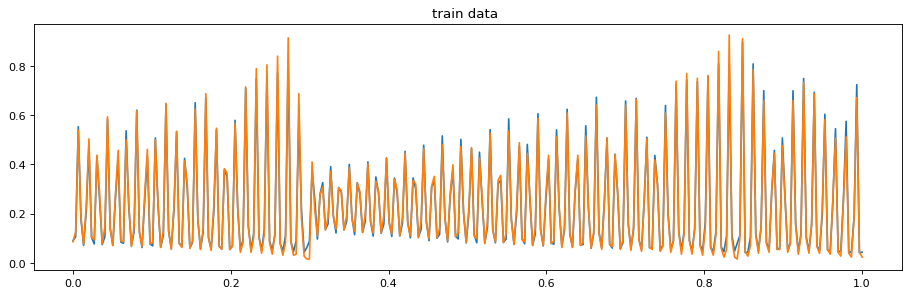

<Figure size 640x480 with 0 Axes>

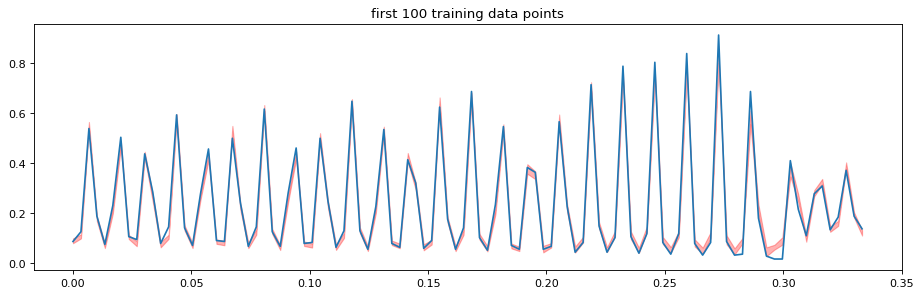

<Figure size 640x480 with 0 Axes>

In [80]:
# figure(figsize=(14, 4), dpi=80)
# for i in range(fx_train.shape[1]):
#     plt.plot(range(int(burnin)) , fx_train[int(burnin):, i])
# plt.show()
# plt.clf()


figure(figsize=(14, 4), dpi=80)
plt.title("train data ")
plt.plot(x_train , fx_train[int(burnin):,].mean(axis=0))
plt.plot(x_train , ytraindata)
plt.show()
plt.clf()

figure(figsize=(14, 4), dpi=80)
plt.title("first 100 training data points")
plt.plot(x_train[:100] , ytraindata[:100])
# plt.plot(range(100) , fx_mu_tr[:100])
# plt.plot(range(100) , fx_high_tr[:100])
# plt.plot(range(100) , fx_low_tr[:100])
plt.fill_between(x_train[:100], np.maximum.reduce(fx_train[int(burnin):,])[:100], np.minimum.reduce(fx_train[int(burnin):,])[:100], alpha=0.3, color='red')
plt.show()
plt.clf()




In [81]:
name

'Lazer'

In [82]:
'result/' + name + "/testfig1.png"

'result/Lazer/testfig1.png'

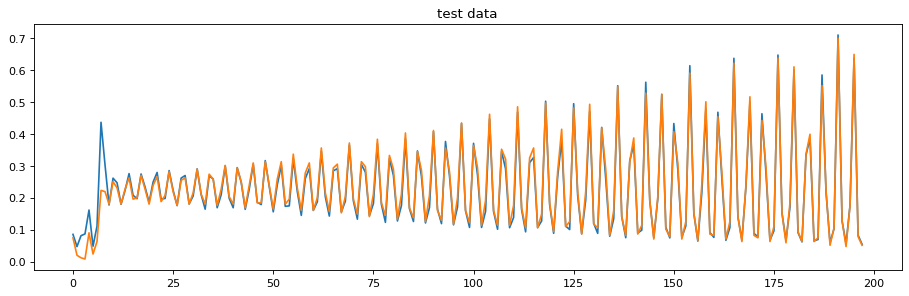

<Figure size 640x480 with 0 Axes>

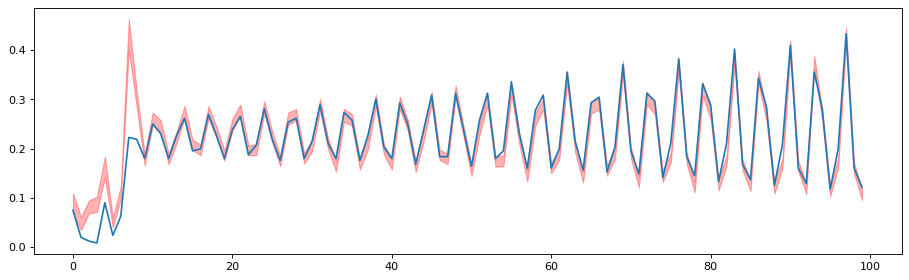

<Figure size 640x480 with 0 Axes>

In [83]:
figure(figsize=(14, 4), dpi=80)
plt.title("test data")
plt.plot(range(fx_test.shape[1]) , fx_test[int(burnin):,].mean(axis=0))
plt.plot(range(fx_test.shape[1]) , ytestdata)
plt.savefig('result/' + name + "/testfig1.png")
plt.show()
plt.clf()

figure(figsize=(14, 4), dpi=80)
plt.plot(range(100) , ytestdata[:100])
plt.fill_between(range(100), np.maximum.reduce(fx_test[int(burnin):,])[:100], np.minimum.reduce(fx_test[int(burnin):,])[:100], alpha=0.3, color='red')
plt.savefig('result/' + name + "/testfig2.png")
plt.show()
plt.clf()

# figure(figsize=(14, 4), dpi=80)
# plt.plot(range(98) , ytestdata[100:])

# plt.fill_between(range(98), np.maximum.reduce(fx_test[int(burnin):,])[100:], np.minimum.reduce(fx_test[int(burnin):,])[100:], alpha=0.3, color='red')
# plt.show()
# plt.savefig('testfig3')
# plt.clf()

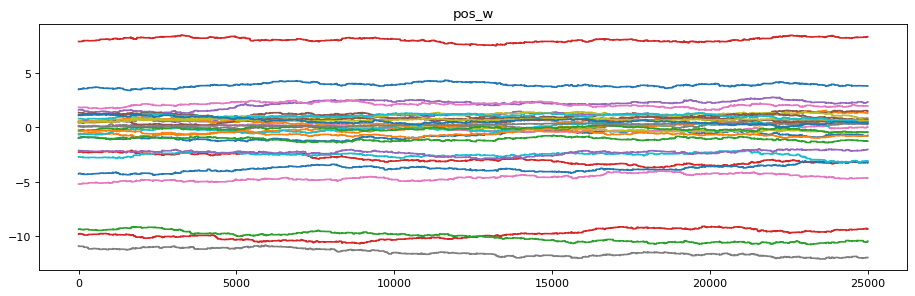

<Figure size 640x480 with 0 Axes>

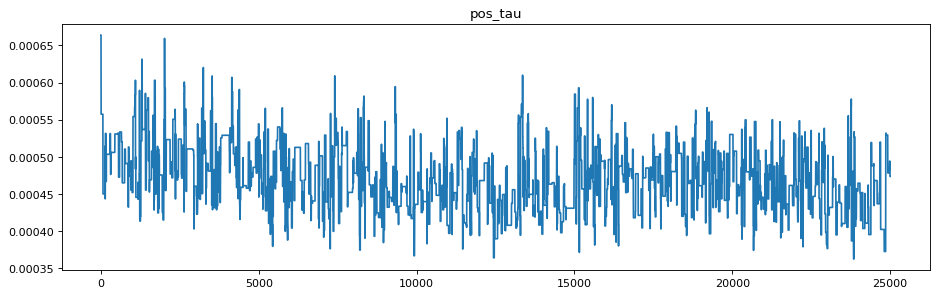

<Figure size 640x480 with 0 Axes>

In [84]:
figure(figsize=(14, 4), dpi=80)
plt.title("pos_w")
for i in range(pos_w.shape[1]):
    plt.plot(range(int(burnin)) , pos_w[:, i])
plt.show()
plt.clf()

figure(figsize=(14, 4), dpi=80)
plt.title("pos_tau")
plt.plot(range(int(burnin)), pos_tau[:, 0])
plt.show()
plt.clf()


In [85]:
print(testdata)

# fx_mu = fx_test[int(burnin):,].mean(axis=0)
# fx_high = np.percentile(fx_test[int(burnin):,], 95, axis=0)
# fx_low = np.percentile(fx_test[int(burnin):,], 5, axis=0)

[[0.0625    0.335938  0.996094  0.417969  0.0742188]
 [0.996094  0.417969  0.0742188 0.03125   0.0195312]
 [0.0742188 0.03125   0.0195312 0.015625  0.0117188]
 [0.0195312 0.015625  0.0117188 0.0078125 0.0078125]
 [0.0117188 0.0078125 0.0078125 0.0273438 0.0898438]
 [0.0078125 0.0273438 0.0898438 0.03125   0.0234375]
 [0.0898438 0.03125   0.0234375 0.03125   0.0625   ]
 [0.0234375 0.03125   0.0625    0.128906  0.222656 ]
 [0.0625    0.128906  0.222656  0.253906  0.21875  ]
 [0.222656  0.253906  0.21875   0.179688  0.179688 ]
 [0.21875   0.179688  0.179688  0.210938  0.25     ]
 [0.179688  0.210938  0.25      0.257812  0.230469 ]
 [0.25      0.257812  0.230469  0.191406  0.179688 ]
 [0.230469  0.191406  0.179688  0.1875    0.226562 ]
 [0.179688  0.1875    0.226562  0.261719  0.261719 ]
 [0.226562  0.261719  0.261719  0.234375  0.195312 ]
 [0.261719  0.234375  0.195312  0.183594  0.199219 ]
 [0.195312  0.183594  0.199219  0.234375  0.269531 ]
 [0.199219  0.234375  0.269531  0.265625  0.22

[  45.83828863   16.67332096   41.93659216  104.86194254   90.57219848
  128.3109093    35.77592847   12.83672835  127.76063626   51.50174678
  164.44146067  101.01980342  964.68817715  378.0856406   172.79451715
  147.63550752 1985.43119512  321.44005973  323.67193328  725.04605646
  169.9826994   637.05922927  957.26536625  883.75102756  576.50129416
   32.67825023  221.3458167    14.77057709  420.39512352  102.270407
   27.49828234]  Rhat


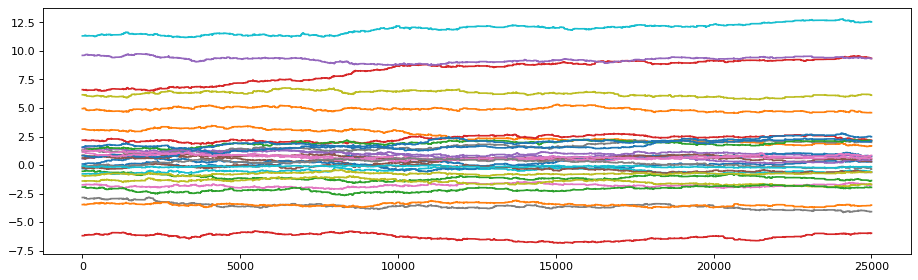

<Figure size 640x480 with 0 Axes>

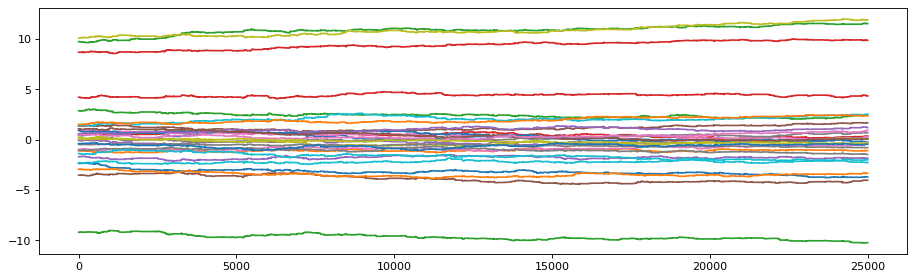

<Figure size 640x480 with 0 Axes>

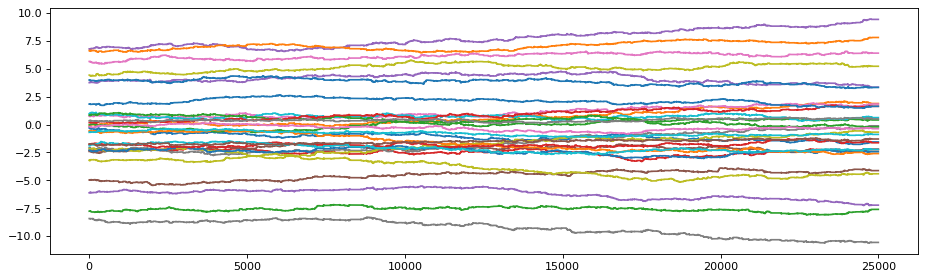

<Figure size 640x480 with 0 Axes>

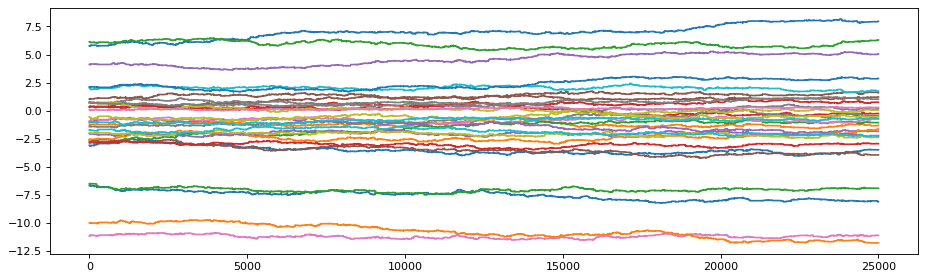

<Figure size 640x480 with 0 Axes>

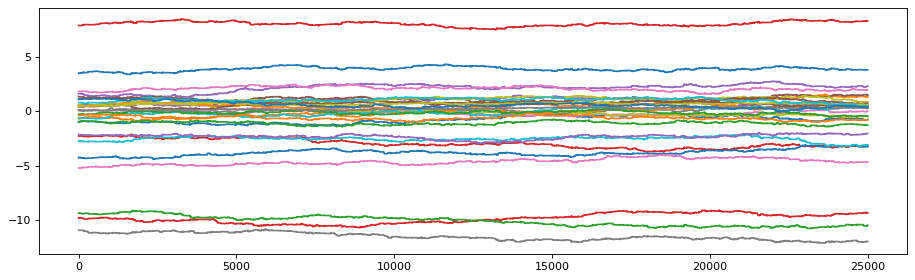

<Figure size 640x480 with 0 Axes>

In [86]:
pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
        
data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

R_hat = gelman_rubin(data)
np.savetxt('result/' + name + '/Rhat.txt', R_hat)

for p in data:
    figure(figsize=(14, 4), dpi=80)
    for i in range(p.shape[1]):
        plt.plot(range(int(burnin)) , p[:, i])
    plt.show()
    plt.clf()


In [87]:
from chainconsumer import ChainConsumer
pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 

In [88]:
dd = np.concatenate((pos_run1,pos_run2,pos_run3,pos_run4,pos_run5), axis=0)
from chainconsumer import ChainConsumer
c = ChainConsumer()
for i in range(data.shape[2]):
    c.add_chain(dd[:, i], walkers = 5)


# Now, lets check our convergence using the Gelman-Rubin statistic
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print(gelman_rubin_converged)

Gelman-Rubin Statistic values for chain Chain 0
0: 5.51994 (Failed)
Gelman-Rubin Statistic values for chain Chain 1
0: 3.51735 (Failed)
Gelman-Rubin Statistic values for chain Chain 2
0: 5.33322 (Failed)
Gelman-Rubin Statistic values for chain Chain 3
0: 8.21995 (Failed)
Gelman-Rubin Statistic values for chain Chain 4
0: 7.62285 (Failed)
Gelman-Rubin Statistic values for chain Chain 5
0: 9.04184 (Failed)
Gelman-Rubin Statistic values for chain Chain 6
0: 4.90620 (Failed)
Gelman-Rubin Statistic values for chain Chain 7
0: 3.02470 (Failed)
Gelman-Rubin Statistic values for chain Chain 8
0: 9.07021 (Failed)
Gelman-Rubin Statistic values for chain Chain 9
0: 5.83513 (Failed)
Gelman-Rubin Statistic values for chain Chain 10
0: 10.23390 (Failed)
Gelman-Rubin Statistic values for chain Chain 11
0: 8.09315 (Failed)
Gelman-Rubin Statistic values for chain Chain 12
0: 24.58788 (Failed)
Gelman-Rubin Statistic values for chain Chain 13
0: 15.41502 (Failed)
Gelman-Rubin Statistic values for chain C

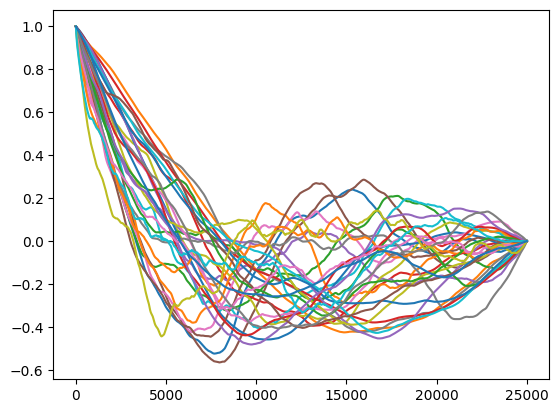

In [89]:
from emcee import autocorr

# "Lazer","Sunspot","Iris","Ionosphere"

        
# for pr in data:
#     for i in range(pr.shape[1]):
#         xc = autocorr.function_1d(pr[:, i])
#         plt.plot(xc)
#     plt.show()
#     plt.clf()
   
for i in range(pos_run1.shape[1]):
    xc = autocorr.function_1d(pos_run1[:, i])
    plt.plot(xc)

# plt.show()  
plt.savefig('result/' + name + '/autocor.jpg')

In [90]:
print(fx_test.shape)
print(fx_mu.shape)

# print(topology, traindata.shape, testdata.shape, learn_rate, prob_type)
nn = Network(topology, traindata, testdata, learn_rate, prob_type)

temp_fx_list = np.empty((pos_w.shape[0], testdata.shape[0]))
for i in range(pos_w.shape[0]):
    temp_fx, temp_prob = nn.evaluate_proposal(testdata, pos_w[i])
    temp_fx_list[i] = temp_fx
    
temp_fx_mu = temp_fx_list.mean(axis=0)
    
print(temp_fx_list.shape)    
print(temp_fx_mu)

(50000, 198)
(198,)
(25000, 198)
[0.08493428 0.04673157 0.08081198 0.08637721 0.16116757 0.04788178
 0.11072938 0.43585194 0.3024891  0.17695504 0.26088354 0.24662615
 0.17921817 0.22233847 0.27522477 0.20724037 0.1967403  0.27399935
 0.23312869 0.1854351  0.24874351 0.27879672 0.19551109 0.19745703
 0.28464631 0.22288189 0.17505991 0.26116903 0.2692312  0.18011443
 0.2050966  0.28988087 0.20941507 0.16382179 0.268144   0.25826413
 0.16838797 0.20911394 0.29951363 0.19771061 0.16834259 0.29385279
 0.24744718 0.1632578  0.22624613 0.304853   0.18578105 0.17820411
 0.31595004 0.23440367 0.15555126 0.23986063 0.30050946 0.172718
 0.17418458 0.32176779 0.21913068 0.1443929  0.25980322 0.29092487
 0.16006217 0.18680979 0.34476877 0.20251951 0.14230626 0.28397467
 0.29077331 0.15527296 0.18879214 0.36470274 0.1898992  0.13254661
 0.30362977 0.27971581 0.14345918 0.18113349 0.36853859 0.17897408
 0.12257918 0.32194512 0.26928667 0.12692585 0.17504416 0.38425089
 0.16567354 0.1252203  0.346209

In [91]:
print(fx_mu.shape)
print(fx_mu)

(198,)
[0.08493428 0.04673157 0.08081198 0.08637721 0.16116757 0.04788178
 0.11072938 0.43585194 0.3024891  0.17695504 0.26088354 0.24662615
 0.17921817 0.22233847 0.27522477 0.20724037 0.1967403  0.27399935
 0.23312869 0.1854351  0.24874351 0.27879672 0.19551109 0.19745703
 0.28464631 0.22288189 0.17505991 0.26116903 0.2692312  0.18011443
 0.2050966  0.28988087 0.20941507 0.16382179 0.268144   0.25826413
 0.16838797 0.20911394 0.29951363 0.19771061 0.16834259 0.29385279
 0.24744718 0.1632578  0.22624613 0.304853   0.18578105 0.17820411
 0.31595004 0.23440367 0.15555126 0.23986063 0.30050946 0.172718
 0.17418458 0.32176779 0.21913068 0.1443929  0.25980322 0.29092487
 0.16006217 0.18680979 0.34476877 0.20251951 0.14230626 0.28397467
 0.29077331 0.15527296 0.18879214 0.36470274 0.1898992  0.13254661
 0.30362977 0.27971581 0.14345918 0.18113349 0.36853859 0.17897408
 0.12257918 0.32194512 0.26928667 0.12692585 0.17504416 0.38425089
 0.16567354 0.1252203  0.34620917 0.26664519 0.12068346 0

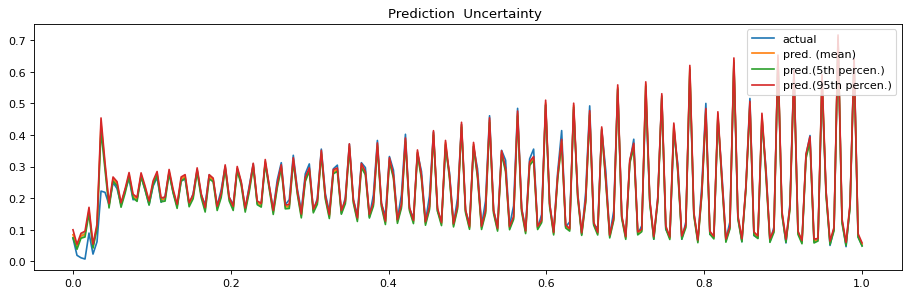

<Figure size 640x480 with 0 Axes>

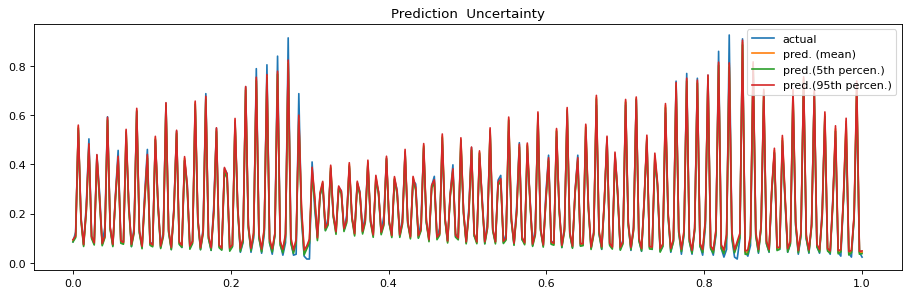

<Figure size 640x480 with 0 Axes>

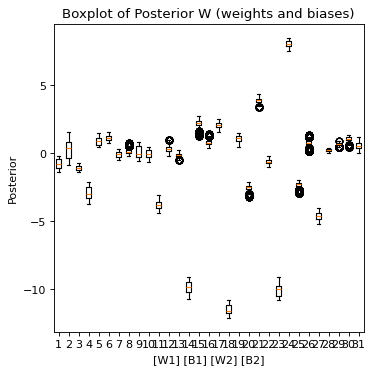

<Figure size 640x480 with 0 Axes>

In [92]:
if prob_type == 'regression':
    
    figure(figsize=(14, 4), dpi=80)
    
    plt.plot(x_test, ytestdata, label='actual')
    plt.plot(x_test, fx_mu, label='pred. (mean)')    
    
    plt.plot(x_test, fx_low, label='pred.(5th percen.)')
    plt.plot(x_test, fx_high, label='pred.(95th percen.)')
    plt.fill_between(x_test, fx_low, fx_high, facecolor='g', alpha=0.4)
    plt.legend(loc='upper right')

    plt.title("Prediction  Uncertainty ")
    plt.show()
#         plt.savefig('mcmcrestest.png') 
    plt.clf()
    
    # -----------------------------------------
    figure(figsize=(14, 4), dpi=80)
    plt.plot(x_train, ytraindata, label='actual')
    plt.plot(x_train, fx_mu_tr, label='pred. (mean)')
    plt.plot(x_train, fx_low_tr, label='pred.(5th percen.)')
    plt.plot(x_train, fx_high_tr, label='pred.(95th percen.)')
    plt.fill_between(x_train, fx_low_tr, fx_high_tr, facecolor='g', alpha=0.4)
    plt.legend(loc='upper right')

    plt.title("Prediction  Uncertainty")
    plt.show()
#         plt.savefig('mcmcrestrain.png') 
    plt.clf()

    mpl_fig = plt.figure(figsize=(5,5), dpi=80)
    ax = mpl_fig.add_subplot(111)

    ax.boxplot(pos_w)
    ax.set_xlabel('[W1] [B1] [W2] [B2]')
    ax.set_ylabel('Posterior')
#         plt.legend(loc='upper right')
    plt.title("Boxplot of Posterior W (weights and biases)")
    plt.show()
#         plt.savefig('w_pos.png')

    plt.clf()

## signal to noise ratio

In [93]:
pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 

In [94]:
signal_to_noise = np.empty(pos_run1.shape[1])

for i in range(pos_run1.shape[1]):
    signal_to_noise[i] = np.absolute(np.mean(pos_run1[:, i])) / np.std(pos_run1[:, i])

[ 0.44342788  4.7906871   5.20144355  9.55287689  5.63265723  2.35699092
 13.67232209  4.56173429 26.92909666  3.30004172  0.870068   27.87131314
  8.20539907  8.7506424   2.4027797   4.26871389  3.09256444 13.30454326
  6.53008642 27.13573586  3.57058173 25.37670757 10.25757678 22.55398814
 39.62823104  1.22058056  4.55989183  0.77383888  8.44607294  2.47239651
  4.77387323]


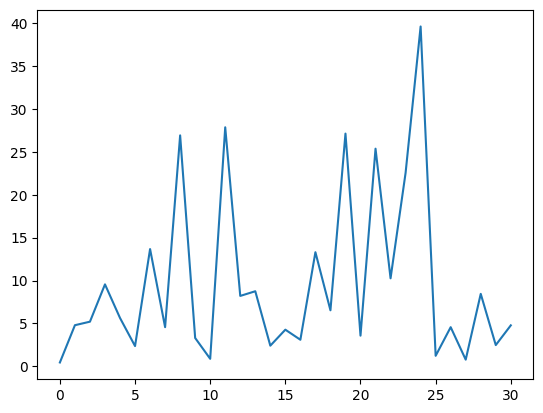

In [95]:
print(signal_to_noise)
plt.plot(signal_to_noise)

In [96]:
print(np.argsort(signal_to_noise))


[ 0 27 10 25  5 14 29 16  9 20 15 26  7 30  1  2  4 18 12 28 13  3 22 17
  6 23 21  8 19 11 24]


In [97]:
def squared_error(prediction, actual):
    return (
        np.sum(np.square(prediction - actual)) / prediction.shape[0]
    ) 


bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(pos_run1.shape[0])

for i in range(pos_run1.shape[0]):
    fx, prob = bnn_model.evaluate_proposal(testdata, pos_run1[i])
    mse_bnn[i] = squared_error(fx, testdata[:, -1])
    
print('bnn mse: ', round(np.mean(mse_bnn), 10))

bnn mse:  0.0006286885


In [98]:
mask = signal_to_noise < np.percentile(signal_to_noise, 25)
new_pos = np.copy(pos_run1)
for i in range(mask.shape[0]):
    if mask[i] == True:
        new_pos[:, i] = 0

In [99]:
mse_list = np.empty(signal_to_noise.shape[0])
sorted_index = np.argsort(signal_to_noise)
new_pos = np.copy(pos_run1)


for j in range(sorted_index.shape[0]):
    mse_bnn = np.empty(pos_run1.shape[0])
    new_pos[:, sorted_index[j]] = 0
    print(sorted_index[j], new_pos[12])
    for i in range(pos_run1.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos[i])
        mse_bnn[i] = squared_error(fx, testdata[:, -1])
    print('bnn mse: ', round(np.mean(mse_bnn), 10))
    mse_list[j] = round(np.mean(mse_bnn), 10)

0 [ 0.          3.14811525 -0.54776674  2.17242337  1.51671193  0.86069627
 -1.73334166  1.22403683  6.15554285 -0.77671634  0.09096685  4.94431186
  1.31363799  6.60322257  0.54629948  0.62401606  1.305445   -2.84675673
 -1.3990649  11.3146691   0.81235315 -3.46524228 -1.9330292  -6.18971004
  9.60821578 -0.23072594  1.12166421 -0.1122587  -0.92570942 -0.08637606
  1.57612855]
bnn mse:  0.0006457388
27 [ 0.          3.14811525 -0.54776674  2.17242337  1.51671193  0.86069627
 -1.73334166  1.22403683  6.15554285 -0.77671634  0.09096685  4.94431186
  1.31363799  6.60322257  0.54629948  0.62401606  1.305445   -2.84675673
 -1.3990649  11.3146691   0.81235315 -3.46524228 -1.9330292  -6.18971004
  9.60821578 -0.23072594  1.12166421  0.         -0.92570942 -0.08637606
  1.57612855]
bnn mse:  0.0012665834
10 [ 0.          3.14811525 -0.54776674  2.17242337  1.51671193  0.86069627
 -1.73334166  1.22403683  6.15554285 -0.77671634  0.          4.94431186
  1.31363799  6.60322257  0.54629948  0.62

In [100]:
signal_to_noise = np.empty(pos_run2.shape[1])

for i in range(pos_run2.shape[1]):
    signal_to_noise[i] = np.absolute(np.mean(pos_run2[:, i])) / np.std(pos_run2[:, i])

mse_list = np.empty(signal_to_noise.shape[0])
sorted_index = np.argsort(signal_to_noise)
new_pos = np.copy(pos_run2)

for j in range(sorted_index.shape[0]):
    mse_bnn = np.empty(pos_run2.shape[0])
    new_pos[:, sorted_index[j]] = 0
    print(sorted_index[j], new_pos[12])
#     for i in range(pos_run2.shape[0]):
    fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
    mse_bnn = squared_error(fx, testdata[:, -1])
    print('bnn mse: ', round(np.mean(mse_bnn), 10))
    mse_list[j] = round(np.mean(mse_bnn), 10)

7 [ 0.43185579 -1.0983464   2.87806573  0.56715088 -0.07159035  1.35635319
  1.02778592  0.          0.23123535  1.42583371  0.90570968  1.5189177
  9.73327091  4.2133044  -1.6841614  -3.52388753 -0.96157895 -1.0598913
 10.0798412  -1.37377908 -2.34927715 -2.91907747 -9.18474378  8.67802406
  0.57621963  1.07633641  0.47876546 -0.46700638  0.04953907 -2.28350688
 -0.39061916]
bnn mse:  0.0005125659
0 [ 0.         -1.0983464   2.87806573  0.56715088 -0.07159035  1.35635319
  1.02778592  0.          0.23123535  1.42583371  0.90570968  1.5189177
  9.73327091  4.2133044  -1.6841614  -3.52388753 -0.96157895 -1.0598913
 10.0798412  -1.37377908 -2.34927715 -2.91907747 -9.18474378  8.67802406
  0.57621963  1.07633641  0.47876546 -0.46700638  0.04953907 -2.28350688
 -0.39061916]
bnn mse:  0.0005655556
25 [ 0.         -1.0983464   2.87806573  0.56715088 -0.07159035  1.35635319
  1.02778592  0.          0.23123535  1.42583371  0.90570968  1.5189177
  9.73327091  4.2133044  -1.6841614  -3.52388753

[0.00051257 0.00056556 0.00137638 0.00090702 0.00141622 0.00125581
 0.00121288 0.00578872 0.00466463 0.0053644  0.02081781 0.01906577
 0.04193933 0.03959818 0.04491837 0.04890265 0.03972551 0.03113425
 0.03113425 0.03458535 0.05238598 0.0461924  0.00994734 0.00994734
 0.00994734 0.1125654  0.03305318 0.07227026 0.06885331 0.06885331
 0.09193096]


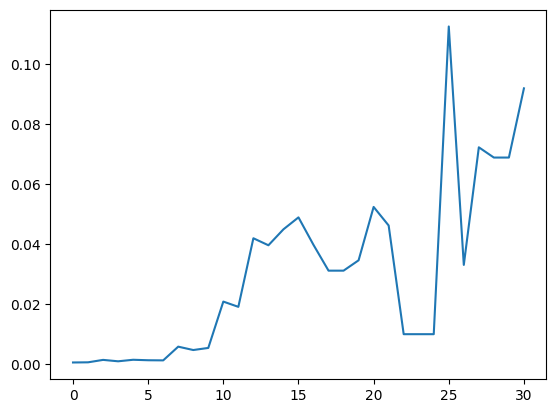

In [101]:
print(mse_list)
plt.plot(mse_list)

[0.00051257 0.00056556 0.00137638 0.00090702 0.00141622 0.00125581
 0.00121288 0.00578872 0.00466463 0.0053644  0.02081781 0.01906577
 0.04193933 0.03959818 0.04491837 0.04890265 0.03972551 0.03113425
 0.03113425 0.03458535 0.05238598 0.0461924  0.00994734 0.00994734
 0.00994734 0.1125654  0.03305318 0.07227026 0.06885331 0.06885331
 0.09193096]


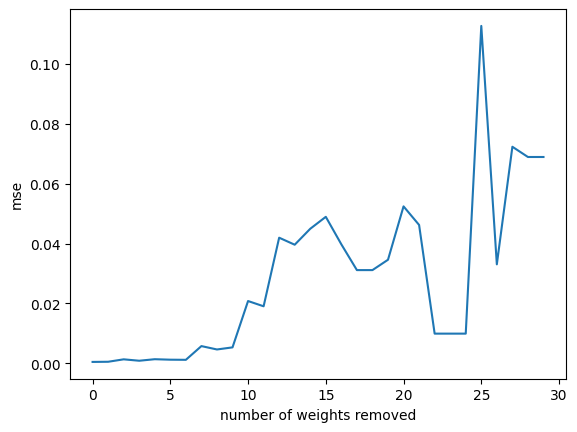

In [102]:
print(mse_list)
plt.xlabel('number of weights removed')
plt.ylabel('mse')
plt.plot(mse_list[:-1])